# Object detection & Object tracking
- yolov4
- Deep SORT
- Norfair

By Pranpaveen Lay.

# Download Resource

In [ ]:
!gdown --id 16W8SKaRKyubcIZRXR5KY_HaxvJjFHM3_
!unzip -q source.zip

Downloading...
From: https://drive.google.com/uc?id=16W8SKaRKyubcIZRXR5KY_HaxvJjFHM3_
To: /content/source.zip
69.1MB [00:00, 145MB/s] 


# Download Package

In [ ]:
!git clone --quiet https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!python setup.py -q build install
%cd ..
!pip install -q norfair[metrics,video]
!pip install -U PyYAML

/content/mish-cuda
/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:370: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
In file included from /usr/local/lib/python3.7/dist-packages/torch/include/ATen/Parallel.h:140:0,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/ATen/CPUApplyUtils.h:3,
                 from csrc/cpu/mish_cpu.cpp:3:
/usr/local/lib/python3.7/dist-packages/torch/include/ATen/ParallelOpenMP.h:87:0: warning: ignoring #pragma omp parallel [-Wunknown-pragmas]
 #pragma omp parallel for if ((end - begin) >= grain_size)
 
In file included from /usr/local/lib/python3.7/dist-packages/torch/include/ATen/Parallel.h:140:0,
                 from /usr/local/lib/python3.

### **Restart Runtime after install mish-cuda**

In [ ]:
!nvidia-smi

Thu Aug 19 08:19:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone --quiet https://github.com/WongKinYiu/PyTorch_YOLOv4.git
%cd PyTorch_YOLOv4
!gdown --id 137U-oLekAu-J-fe0E_seTblVxnU3tlNC

/content/PyTorch_YOLOv4
Downloading...
From: https://drive.google.com/uc?id=137U-oLekAu-J-fe0E_seTblVxnU3tlNC
To: /content/PyTorch_YOLOv4/yolov4.weights
258MB [00:02, 115MB/s]


In [ ]:
!pwd

/content/PyTorch_YOLOv4


In [ ]:
!python detect.py --source ../source/cat1.jpeg --weights yolov4.weights --cfg cfg/yolov4.cfg

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov4.cfg', classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, names='data/coco.names', output='inference/output', save_txt=False, source='../source/cat1.jpeg', update=False, view_img=False, weights=['yolov4.weights'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 327 layers, 6.43631e+07 parameters, 6.43631e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/1 /content/source/cat1.jpeg: 640x448 1 cats, Done. (0.143s)
Results saved to inference/output
Done. (0.424s)


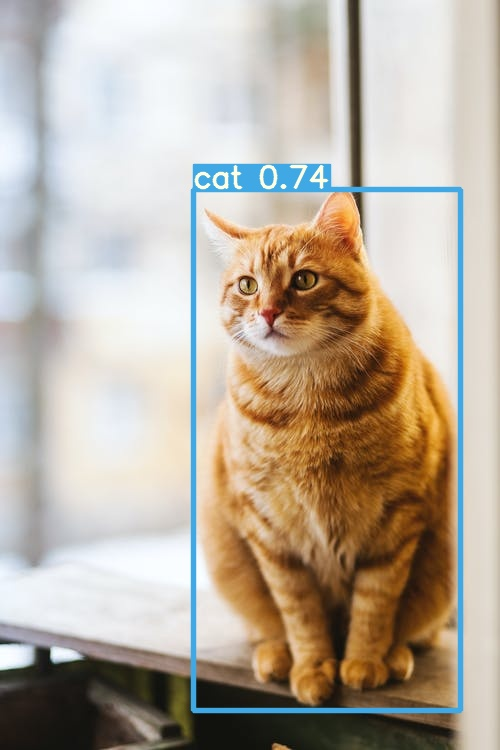

In [ ]:
from IPython.display import Image
Image('/content/PyTorch_YOLOv4/inference/output/cat1.jpeg')

In [ ]:
!python detect.py --source ../source/cat_trim.mp4 --weights yolov4.weights

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov4.cfg', classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, names='data/coco.names', output='inference/output', save_txt=False, source='../source/cat_trim.mp4', update=False, view_img=False, weights=['yolov4.weights'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 327 layers, 6.43631e+07 parameters, 6.43631e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
video 1/1 (1/300) /content/source/cat_trim.mp4: 384x640 1 benchs, 1 cats, Done. (0.122s)
video 1/1 (2/300) /content/source/cat_trim.mp4: 384x640 

In [ ]:
!ffmpeg -i /content/PyTorch_YOLOv4/inference/output/cat_trim.mp4 aaa.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('aaa.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1280 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
!python detect.py --source ../cctv.mp4 --weights yolov4.weights
!ffmpeg -i /content/PyTorch_YOLOv4/inference/output/cctv.mp4 out_cctv.mp4

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov4.cfg', classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, names='data/coco.names', output='inference/output', save_txt=False, source='../cctv.mp4', update=False, view_img=False, weights=['yolov4.weights'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 327 layers, 6.43631e+07 parameters, 6.43631e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
video 1/1 (1/749) /content/cctv.mp4: 384x640 1 cars, Done. (0.033s)
video 1/1 (2/749) /content/cctv.mp4: 384x640 1 cars, Done. (0.033s)
video 1/1 (3/749) /co

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('out_cctv.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1280 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Custom

CONFIG

In [ ]:
DEVICE = '0' # or 'cpu'
CFG_PATH = 'cfg/yolov4.cfg'
IMG_WIDTH = 640
WEIGHTS = './yolov4.weights'
is_half =True
threshold_confidence = 0.4
threshold_nms = 0.5
best_top = 216
best_bottom = 864
only_classes = [1,2,3,5,6,7,8,9,10]
YOLO_NAME = './data/coco.names'

SOURCE = '../source/cctv.mp4'
OUTPUT = '../cctv_out.mp4'

In [ ]:
import cv2
import time 
import numpy
import os
import torch
import torch.backends.cudnn as cudnn
from utils.general import non_max_suppression, scale_coords
from utils.torch_utils import select_device
from utils.datasets import letterbox
from models.models import Darknet,load_darknet_weights


In [ ]:
device = select_device(DEVICE)
device

Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)



device(type='cuda', index=0)

In [ ]:
model = Darknet(CFG_PATH,IMG_WIDTH).to(device)

Model Summary: 327 layers, 6.43631e+07 parameters, 6.43631e+07 gradients


In [ ]:
# Torch weights
try:
    model.load_state_dict(torch.load(WEIGHTS, map_location=device)['model'])
except:
    #Darknet weighrs
    load_darknet_weights(model, WEIGHTS)

model.to(device).eval()
None

In [ ]:
with open(YOLO_NAME) as f:
    names = [line.rstrip() for line in f]

In [ ]:
names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
if is_half:
    model.half()

In [ ]:
frame_count = 0
detection = []

In [ ]:
vc = cv2.VideoCapture(SOURCE)

In [ ]:
vid_width = int(vc.get(3))
vid_height = int(vc.get(4))
fps = vc.get(cv2.CAP_PROP_FPS)
print(vid_height,vid_width,fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v') #*avc1
outvid = cv2.VideoWriter(OUTPUT, 
                       fourcc,
                       fps,(vid_width,vid_height))

1080 1920 25.0


In [ ]:
while True:
    (ret, frame) = vc.read()
    if not ret:
        break
    ori_frame = frame.copy()
    input_shape = frame.shape
    start = time.time()
    frame = letterbox(frame, new_shape=int(IMG_WIDTH))[0]
    frame = frame[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB,to 3xwxh
    frame = numpy.ascontiguousarray(frame)
    frame = torch.from_numpy(frame).to(device)
    frame = frame.half() if is_half else frame.float()
    frame = frame/255.0
    if frame.ndimension() == 3:
        frame = frame.unsqueeze(0)
    pred = model(frame)[0]
    # Apply NMS
    pred = non_max_suppression(pred, float(threshold_confidence), 
                float(threshold_nms), classes=only_classes, 
                agnostic=True)
    
    frame_detection = []
    obj_no = 0
    pred = pred[0]
    #print(pred)
    #pred[:, :4] = scale_coords(frame.shape[2:], pred[:, :4], input_shape).round()
    if pred is not None and len(pred):
        # Rescale boxes from img_size to im0 size
        pred[:, :4] = scale_coords(frame.shape[2:], pred[:, :4], input_shape).round()
        #print(pred)
        for idx, c in enumerate(pred):
            if int(c[5]) not in only_classes:
                continue
            #print(c)
            if c[4] > float(threshold_confidence):
                cv2.rectangle(ori_frame, (int(c[0]), int(c[1])), (int(c[2]), int(c[3])), (0,0,255), 3)
                pred_cls = int(c[5])
                label = f"""{pred_cls} : {names[pred_cls]}"""
                cv2.putText(ori_frame, label, (int(c[0]), int(c[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)     
                # class, score, X, Y, Width, Height
                # frame_detection.append([int(c[5]), float(c[4]),
                #     int(c[0]), int(c[1]),
                #     int(c[2]-c[0]), int(c[3]-c[1])])
                obj_no += 1
    end = time.time()
    detection.append(frame_detection)
    print(f"FPS: {1/(end-start)}")
    frame_count += 1
    outvid.write(ori_frame)

outvid.release()


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


FPS: 6.631352609344565
FPS: 7.415068788606302
FPS: 8.055141262034304
FPS: 8.578817542553496
FPS: 9.019659454042639
FPS: 9.811558741104973
FPS: 10.274666967159703
FPS: 10.070526995651788
FPS: 10.144008358405324
FPS: 10.197031065383662
FPS: 10.122098312864559
FPS: 10.144032891952355
FPS: 10.245753230573808
FPS: 10.028126449478068
FPS: 10.12446834703602
FPS: 10.184428229752207
FPS: 10.152061730905148
FPS: 10.115068043862546
FPS: 10.061854087301969
FPS: 10.15523256799324
FPS: 10.17859543622337
FPS: 10.128233362310441
FPS: 10.146904136366055
FPS: 10.05796941582157
FPS: 10.143517712384158
FPS: 10.21244932494126
FPS: 10.429648491117787
FPS: 10.309594798874237
FPS: 9.975749791889642
FPS: 10.24207542055641
FPS: 10.168823202825923
FPS: 10.122318166241113
FPS: 10.094278638694819
FPS: 10.18893096855847
FPS: 10.075970288371915
FPS: 10.109363137001589
FPS: 10.073574514791037
FPS: 10.003038375589966
FPS: 9.977363445628024
FPS: 10.213444048068377
FPS: 10.461124052855526
FPS: 10.21764889304646
FPS: 10.

In [ ]:
!ffmpeg -i ../cctv_out.mp4 ../cctv_out_coded.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('../cctv_out_coded.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1200 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Object Tracking

## DEEPSORT

In [ ]:
%cd ..
!git clone https://github.com/mikel-brostrom/Yolov5_DeepSort_Pytorch.git
!cp -r Yolov5_DeepSort_Pytorch/deep_sort_pytorch PyTorch_YOLOv4
%cd PyTorch_YOLOv4

/content
Cloning into 'Yolov5_DeepSort_Pytorch'...
remote: Enumerating objects: 852, done.
remote: Total 852 (delta 0), reused 0 (delta 0), pack-reused 852
Receiving objects: 100% (852/852), 25.69 MiB | 34.21 MiB/s, done.
Resolving deltas: 100% (393/393), done.
/content/PyTorch_YOLOv4


In [ ]:
!gdown --id 1_qwTWdzT9dWNudpusgKavj_4elGgbkUN
!mv ckpt.t7 deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7

Downloading...
From: https://drive.google.com/uc?id=1_qwTWdzT9dWNudpusgKavj_4elGgbkUN
To: /content/PyTorch_YOLOv4/ckpt.t7
46.0MB [00:00, 126MB/s] 


In [ ]:
from deep_sort_pytorch.utils.parser import get_config
from deep_sort_pytorch.deep_sort import DeepSort
from utils.general import xyxy2xywh

In [ ]:
cfg = get_config()
cfg.merge_from_file("deep_sort_pytorch/configs/deep_sort.yaml")

In [ ]:
palette = (2 ** 11 - 1, 2 ** 15 - 1, 2 ** 20 - 1)
def compute_color_for_labels(label):
    """
    Simple function that adds fixed color depending on the class
    """
    color = [int((p * (label ** 2 - label + 1)) % 255) for p in palette]
    return tuple(color)

In [ ]:
deepsort = DeepSort(cfg.DEEPSORT.REID_CKPT,
                        max_dist=cfg.DEEPSORT.MAX_DIST, min_confidence=cfg.DEEPSORT.MIN_CONFIDENCE,
                        nms_max_overlap=cfg.DEEPSORT.NMS_MAX_OVERLAP, max_iou_distance=cfg.DEEPSORT.MAX_IOU_DISTANCE,
                        max_age=cfg.DEEPSORT.MAX_AGE, n_init=cfg.DEEPSORT.N_INIT, nn_budget=cfg.DEEPSORT.NN_BUDGET,
                        use_cuda=True)

OUTPUT = '../cctv_track.mp4'
vc = cv2.VideoCapture(SOURCE)
vid_width = int(vc.get(3))
vid_height = int(vc.get(4))
fps = vc.get(cv2.CAP_PROP_FPS)
print(vid_height,vid_width,fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v') #*avc1
outvid = cv2.VideoWriter(OUTPUT, 
                       fourcc,
                       fps,(vid_width,vid_height))

detections =[]
while True:
    (ret, frame) = vc.read()
    if not ret:
        break
    ori_frame = frame.copy()
    input_shape = frame.shape
    start = time.time()
    frame = letterbox(frame, new_shape=int(IMG_WIDTH))[0]
    frame = frame[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB,to 3xwxh
    frame = numpy.ascontiguousarray(frame)
    frame = torch.from_numpy(frame).to(device)
    frame = frame.half() if is_half else frame.float()
    frame = frame/255.0
    if frame.ndimension() == 3:
        frame = frame.unsqueeze(0)
    pred = model(frame)[0]
    # Apply NMS
    pred = non_max_suppression(pred, float(threshold_confidence), 
                float(threshold_nms), classes=only_classes, 
                agnostic=True)
    if pred == []:
        continue
    frame_detection = []
    obj_no = 0
    pred = pred[0]

    if pred is not None and len(pred):
        # Rescale boxes from img_size to im0 size
        pred[:, :4] = scale_coords(frame.shape[2:], pred[:, :4], input_shape).round()
        bbox_xywh = []
        confs = []
        xywhs = xyxy2xywh(pred[:, 0:4])
        confs = pred[:, 4]
        clss = pred[:, 5]
        outputs = deepsort.update(xywhs.cpu().detach().numpy(), confs.cpu().detach().numpy(), clss, ori_frame)
        #print(outputs)



        for idx, c in enumerate(outputs):
            if int(c[5]) not in only_classes:
                continue
            #print(c)
            if c[4] > float(threshold_confidence):
                color = compute_color_for_labels(c[4])
                pred_cls = int(c[5])
                label = f"""ID {c[4]} : {names[pred_cls]}"""
                t_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_PLAIN, 2, 2)[0]
                cv2.rectangle(ori_frame, (int(c[0]), int(c[1])), (int(c[2]), int(c[3])), color, 4)
                cv2.putText(ori_frame, label, (int(c[0]), int(c[1])-t_size[1]-4), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 2)     
                obj_no += 1

    end = time.time()
    detection.append(frame_detection)
    print(f"FPS: {1/(end-start)}")
    frame_count += 1
    outvid.write(ori_frame)

outvid.release()


1080 1920 25.0
FPS: 22.220418629045504
FPS: 21.243758768619863
FPS: 21.69931502597107
FPS: 22.859734030957053
FPS: 24.889943862231032
FPS: 24.49614829783382
FPS: 24.39683573755235
FPS: 29.488965289349167
FPS: 29.33448965604062
FPS: 26.467328407090257
FPS: 28.436537692292045
FPS: 30.76852653354656
FPS: 27.882097985774113
FPS: 27.31769333975954
FPS: 28.16500245099685
FPS: 30.41554749818709
FPS: 26.682850799346017
FPS: 29.56629376643334
FPS: 27.059676649333557
FPS: 24.658451697864734
FPS: 25.144350724481292
FPS: 24.855134814814814
FPS: 24.701727935546945
FPS: 25.305001508295625
FPS: 23.459781751469627
FPS: 24.650915673413735
FPS: 31.780327024201004
FPS: 31.786348169423963
FPS: 31.51503129484781
FPS: 25.194495335692018
FPS: 18.566425270464084
FPS: 24.790788944842422
FPS: 24.78932375087176
FPS: 24.400242006794805
FPS: 21.82566749751526
FPS: 24.861617251312936
FPS: 31.67879396681294
FPS: 31.20274361892859
FPS: 28.192642482170825
FPS: 31.441794916003868
FPS: 33.78933546011874
FPS: 38.80129883

In [ ]:
!ffmpeg -y -i ../cctv_track.mp4 ../cctv_track_coded.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('../cctv_track_coded.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1200 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

## NORFAIR

In [ ]:
from norfair import Detection, Tracker

In [ ]:
def euclidean_distance(detection, tracked_object):
    return np.linalg.norm(detection.points - tracked_object.estimate)

In [ ]:
tracker = Tracker(distance_function=euclidean_distance, distance_threshold=20)
OUTPUT = '../cctv_track.mp4'
vc = cv2.VideoCapture(SOURCE)
vid_width = int(vc.get(3))
vid_height = int(vc.get(4))
fps = vc.get(cv2.CAP_PROP_FPS)
print(vid_height,vid_width,fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v') #*avc1
outvid = cv2.VideoWriter(OUTPUT, 
                       fourcc,
                       fps,(vid_width,vid_height))

detections =[]
while True:
    (ret, frame) = vc.read()
    if not ret:
        break
    ori_frame = frame.copy()
    input_shape = frame.shape
    start = time.time()
    frame = letterbox(frame, new_shape=int(IMG_WIDTH))[0]
    frame = frame[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB,to 3xwxh
    frame = numpy.ascontiguousarray(frame)
    frame = torch.from_numpy(frame).to(device)
    frame = frame.half() if is_half else frame.float()
    frame = frame/255.0
    if frame.ndimension() == 3:
        frame = frame.unsqueeze(0)
    pred = model(frame)[0]
    # Apply NMS
    pred = non_max_suppression(pred, float(threshold_confidence), 
                float(threshold_nms), classes=only_classes, 
                agnostic=True)
    
    frame_detection = []
    obj_no = 0
    pred = pred[0]
    #print(pred)
    #pred[:, :4] = scale_coords(frame.shape[2:], pred[:, :4], input_shape).round()
    if pred is not None and len(pred):
        # Rescale boxes from img_size to im0 size
        pred[:, :4] = scale_coords(frame.shape[2:], pred[:, :4], input_shape).round()
        #print(pred)]
        pred = pred.cpu().detach().numpy()
        detections = [
            Detection(np.array([(box[0],box[1]),(box[2],box[3])]), data=(box, frame.shape[0], frame.shape[1]))
            for box in pred if box[-1] in only_classes
        ]
        tracked_objects = tracker.update(detections=detections)
        #print(tracked_objects)
        for idx, obj in enumerate(tracked_objects):
            #print(obj)
            if not obj.live_points[0]:
                continue
            point = obj.estimate.astype(int).tolist()
            c = obj.last_detection.data[0]
            #print(c)
            if c[4] > float(threshold_confidence):
                cv2.rectangle(ori_frame, (int(c[0]), int(c[1])), (int(c[2]), int(c[3])), (0,0,255), 3)
                pred_cls = int(c[5])
                label = f"""ID:{obj.id},{names[pred_cls]}"""
                cv2.putText(ori_frame, label, (int(c[0]), int(c[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)   
                # class, score, X, Y, Width, Height
                # frame_detection.append([int(c[5]), float(c[4]),
                #     int(c[0]), int(c[1]),
                #     int(c[2]-c[0]), int(c[3]-c[1])])
                obj_no += 1

    end = time.time()
    detection.append(frame_detection)
    print(f"FPS: {1/(end-start)}")
    frame_count += 1
    outvid.write(ori_frame)

outvid.release()


1080 1920 25.0
FPS: 25.450410490100303
FPS: 25.227682276943064
FPS: 24.820276115914243
FPS: 26.90484560021553
FPS: 27.621908895137867
FPS: 25.821112185031737
FPS: 28.10687074054963
FPS: 26.88690880652316
FPS: 28.51405884592375
FPS: 29.329771686304674
FPS: 26.888804836300462
FPS: 27.02445813252236
FPS: 22.828628966418112
FPS: 28.09087012430347
FPS: 28.717094812948456
FPS: 28.132887067456352
FPS: 28.79062073131388
FPS: 28.229073703905613
FPS: 28.924040245222777
FPS: 28.304320246177102
FPS: 29.610544373768963
FPS: 29.456864342500772
FPS: 30.320781314383616
FPS: 30.47455188799198
FPS: 26.646743411857386
FPS: 24.15030372822801
FPS: 31.715923354959696
FPS: 31.597414533455876
FPS: 34.0330731406501
FPS: 32.4162332192072
FPS: 27.235032856289447
FPS: 29.835072519436917
FPS: 26.80957250971569
FPS: 29.778093317808764
FPS: 29.918283496918512
FPS: 30.536230934439956
FPS: 26.68437861841687
FPS: 26.246716269406708
FPS: 30.420841915924452
FPS: 30.284439374138067
FPS: 31.117323243564062
FPS: 32.12499808

In [ ]:
!ffmpeg -y -i ../cctv_track.mp4 ../cctv_track_coded.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('../cctv_track_coded.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1200 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
print

<function print>